In [138]:
# 14/01/2024

from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [139]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [140]:
len(penguins)

344

Lo primero, eliminar fila con nulos

In [141]:
penguins = penguins.dropna()

In [142]:
len(penguins)

333

Veamos si hay aproximadamente el mismo numero de cada especie

In [143]:
penguins.species.value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


In [144]:
# El algoritmo mas absurdo tendrá un accuracy igual al numero total de la mayor cantidad de especies: 45.6456% (Adelie)
penguins.species.value_counts()/333

,count
species,
Adelie,0.438438
Gentoo,0.357357
Chinstrap,0.204204


Partir en x e y. El objetivo es la especie

In [145]:
y = penguins.species
penguins = penguins.drop("species", axis = 1)

In [146]:
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [147]:
y

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


¿Podemos predecir la especie a partir de resto de columnas?

In [148]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [149]:
# la opcion mas sencilla es cargarse las islas o hacer 3 columnas binarias
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [150]:
penguins = penguins.drop("island", axis = 1)

penguins['sex'] = penguins['sex'].replace({'Male': 1, 'Female': 0})

penguins.head()

<ipython-input-150-9bea24fb59a5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['sex'] = penguins['sex'].replace({'Male': 1, 'Female': 0})


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [151]:
# Estas columnas no aportan y en realidad solo meten ruido
penguins = penguins.drop("flipper_length_mm", axis = 1)
penguins = penguins.drop("body_mass_g", axis = 1)
penguins = penguins.drop("sex", axis = 1)

In [152]:
scaler = MinMaxScaler()
transformado = scaler.fit_transform(penguins)

In [153]:
transformado[0:5]

array([[0.25454545, 0.66666667],
       [0.26909091, 0.51190476],
       [0.29818182, 0.58333333],
       [0.16727273, 0.73809524],
       [0.26181818, 0.89285714]])

In [154]:
X_train, X_test, y_train, y_test = train_test_split(penguins, y, random_state=0)

In [155]:
# Crear el clasificador: uso básico
cla = KNeighborsClassifier(n_neighbors=3)

In [156]:
# Entrenarlo con datos de train
cla.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [157]:
y_predict = cla.predict(X_test)
y_predict

array(['Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo'],
      dtype=object)

In [158]:
accuracy_score(y_test,y_predict)

0.9523809523809523

In [159]:
(y_test == y_predict).sum()/len(y_test)

0.9523809523809523

Text(0.5, 0.98, 'Predicciones')

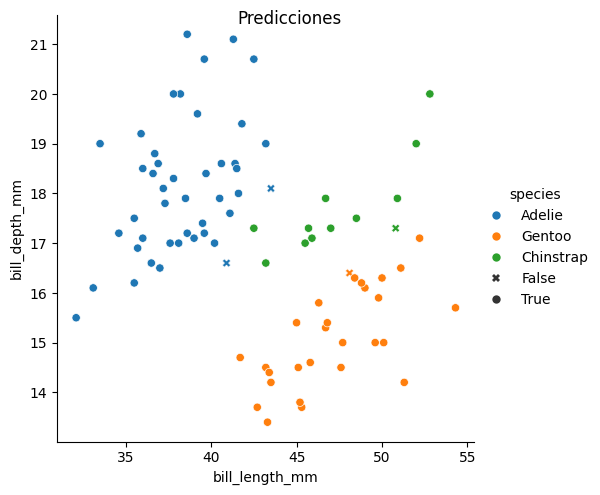

In [160]:
rel = sns.relplot(data = X_test, x ="bill_length_mm" , y ="bill_depth_mm" , hue = y_predict, style=(y_predict==y_test), markers = ["X","o"])
rel.fig.suptitle('Predicciones')

In [161]:
# 16/01/2024

Vamos a repetir la prueba usando todas las columnas. Para 'sex', que es binaria, podemos sustituir los valores por 0 y 1. Para island; que hay 3 valores, sustituirlos por 0, 1 y 2 no es buena idea (en ppio) porque en realidad no hay un orden entre ellas. Una opcion es cambiarla por 3 columnas binarias.

In [162]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

In [163]:
penguins.sex = penguins.sex.str.replace("Male","1")
penguins.sex = penguins.sex.str.replace("Female","0")
penguins.sex = penguins.sex.astype(int)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [164]:
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
dummies = pd.get_dummies(penguins.island, dtype='int')
dummies.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [165]:
penguins = pd.concat([penguins, dummies], axis=1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0,0,1


Quitamos la columna de isla original y separamos la de especie, que es la columna objetivo

In [166]:
y = penguins.species
y

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [167]:
penguins = penguins.drop("species", axis = 1)
penguins = penguins.drop("island", axis = 1)

penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1


In [168]:
scaler = MinMaxScaler()
transformado = scaler.fit_transform(penguins)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(transformado, y, random_state=10)

cla = KNeighborsClassifier(n_neighbors=11)
cla.fit(X_train, y_train)

y_predict = cla.predict(X_test)

accuracy_score(y_test,y_predict)

1.0

Validacion cruzada: cross validations con k=3
- Predices en la fila 3: Entrenas con las filas 1 y 2
- Predices en la fila 2: Entrenas con las filas 1 y 3
- Predices en la fila 1: Entrenas con las filas 2 y 3

Empezamos sólo con cross validate

In [179]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [172]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

penguins.sex = penguins.sex.str.replace("Male","1")
penguins.sex = penguins.sex.str.replace("Female","0")
penguins.sex = penguins.sex.astype(int)

dummies = pd.get_dummies(penguins.island, dtype='int')
penguins = pd.concat([penguins, dummies], axis=1)

y = penguins.species

penguins = penguins.drop("species", axis = 1)
penguins = penguins.drop("island", axis = 1)

scaler = MinMaxScaler()

penguins = pd.DataFrame(scaler.fit_transform(penguins), columns=penguins.columns)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0,1.0
4,0.261818,0.892857,0.305085,0.263889,1.0,0.0,0.0,1.0


Crear el clasificador y llamar a cross-validate

In [176]:
result = cross_validate(cla, penguins, y, cv=3, scoring='accuracy')
result

{'fit_time': array([0.01181984, 0.01474833, 0.00487709]),
 'score_time': array([0.02946472, 0.01541185, 0.0121944 ]),
 'test_score': array([1.        , 0.99099099, 1.        ])}

Continuamos con GridSearch, que añade busqueda de parametros

In [181]:
# uniform: cuando coges los vecinos mas cercanos todos cuentan los mismo
# distance: los vecinos mas lejanos cuentan menos

# p : 1 --> Distancia Manhattan
# p : 2 --> Distancia Euclidea

parameters = {'weights': ('uniform', 'distance'), 'n_neighbors': [5, 10, 15, 20], 'p': [1, 2]}
#                               2                                       4                 2
# 2*4*2*cv(cv=5) = 80 combinaciones

In [182]:
clf = GridSearchCV(cla, parameters, cv=5)
clf.fit(penguins, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': [5, 10, 15, 20], 'p': [1, 2],
                         'weights': ('uniform', 'distance')})

In [183]:
# de todas las combinaciones encuentra la mejor:
clf.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

In [184]:
clf.best_score_

0.9970149253731343